In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report 

In [2]:
data =  pd.read_csv("Chapter 3 - wine.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
data["quality"].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

<Axes: ylabel='quality'>

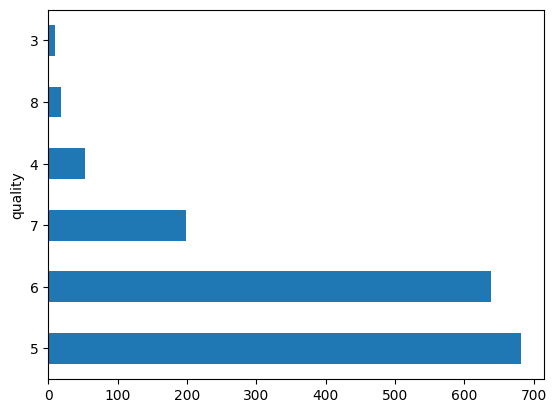

In [4]:
data["quality"].value_counts().plot(kind = "barh")

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.count().isnull()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

<Axes: >

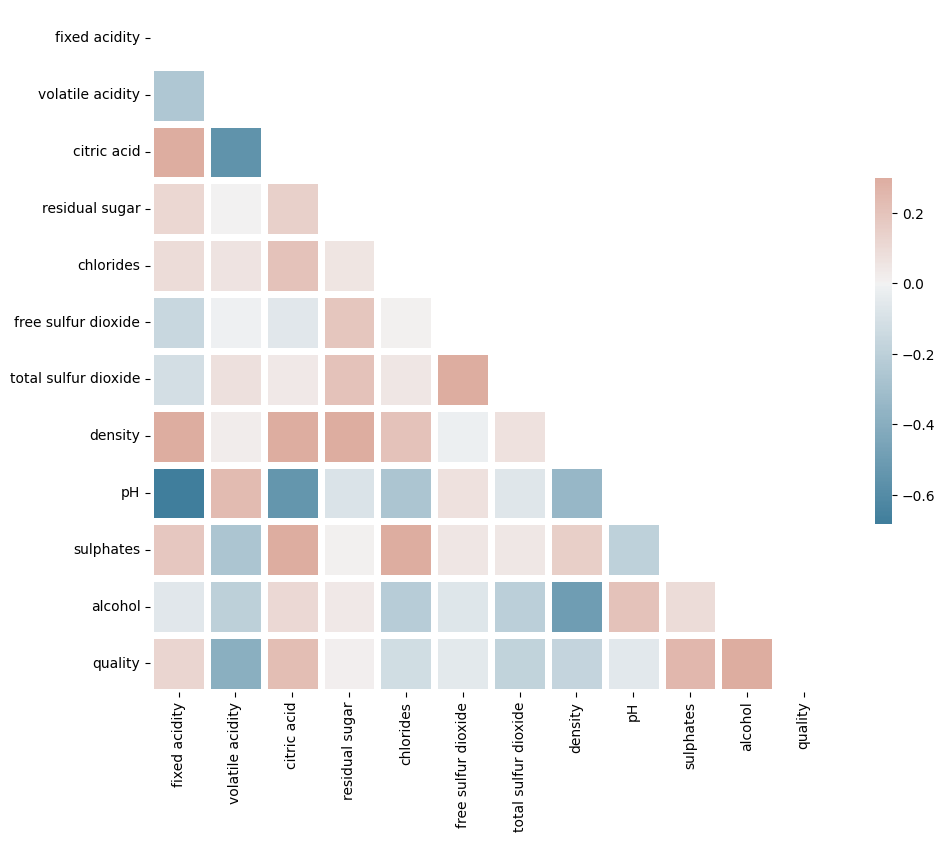

In [7]:
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr , dtype=bool))
f , ax = plt.subplots(figsize=(11,9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=5, cbar_kws={"shrink": .5} )
#corrilation heat map code


#### Feature engineering


In [8]:
def quality_group(q):
    if q in [3, 4]:
        return 0  # low
    elif q in [5, 6]:
        return 1  # medium
    else:
        return 2  # high

y = data['quality'].apply(quality_group)

y.value_counts()

quality
1    1319
2     217
0      63
Name: count, dtype: int64

#### Scaling data

In [9]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

scaled_data = data.copy()
scaled_data = scaled_data.drop('quality', axis=1)
X_scaled = scaler.fit_transform(scaled_data)

#### Split data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y,  random_state=42)


In [11]:
X_train

array([[-0.35600048,  0.90601191, -0.26176211, ..., -0.0072127 ,
        -1.05131114, -0.86637886],
       [-0.87307788,  0.68255284, -1.28877135, ...,  0.25195842,
        -0.22512806, -0.02157362],
       [-0.47090657,  0.45909378, -0.05636026, ..., -0.07200549,
        -0.75624575, -0.58477711],
       ...,
       [ 1.53994999, -1.27271396,  1.58685452, ..., -0.0072127 ,
         1.30921194,  0.07229363],
       [ 0.56324823, -0.82579583,  1.0733499 , ..., -0.52555495,
        -0.52019345,  2.60670935],
       [-1.33270223,  0.62668808, -1.13471997, ...,  1.3534357 ,
         0.71908117,  0.16616088]])

In [12]:
print(pd.Series(y_test).value_counts())

quality
1    264
2     43
0     13
Name: count, dtype: int64


#### Support victor machine

In [13]:
from sklearn.svm import SVC

svc_clf = SVC() #creating Classifier object  

svc_clf.fit(X_train , y_train)

SVC()

In [14]:
svc_clf_predicions = svc_clf.predict(X_test) #We take the trained model (svc_clf) and use it to predict labels for scaled_X_test
                                                    #The trained model is now used to predict labels for scaled_X_test
svc_clf_predicions

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

confusion_matrix ( y_test , svc_clf_predicions) #compering the result of the predicion what y_test is should be with what is actully is

array([[  0,  13,   0],
       [  0, 254,  10],
       [  0,  25,  18]])

In [16]:
accuracy_score( y_test , svc_clf_predicions) 

0.85

In [17]:
from sklearn.metrics import classification_report 

print(classification_report(svc_clf_predicions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.96      0.87      0.91       292
           2       0.42      0.64      0.51        28

    accuracy                           0.85       320
   macro avg       0.46      0.50      0.47       320
weighted avg       0.91      0.85      0.88       320



c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

### Random Forest

#### Hyperparameter grid

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
#Define the Hyperparameter Grid
param_grid  =  [    
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # Try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]


#### Grid search

In [19]:
rfc = RandomForestClassifier(random_state= 42) #initializes a RandomForestClassifier() with default parameters.
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring= 'accuracy',return_train_score = True) #GridSearchCV is used to find the best hyperparameters by trying all possible combinations.
                                                                                               # cv=5: Performs 5-fold cross-validation (splits data into 5 parts and trains on 4 while testing on 1, rotating through).
                                                                                               #Since we have 18 hyperparameter combinations and 5-fold cross-validation,→ Total training runs = 18 × 5 = 90
grid_search.fit(X_train,y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')


#### Best model and evaluation

In [20]:
best_model = grid_search.best_estimator_
best_model

RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [21]:
rfc_hyperparameters = grid_search.best_params_ #Returns the best hyperparameters.
rfc_hyperparameters

{'max_features': 2, 'n_estimators': 30}

In [22]:
y_pred = best_model.predict(X_test)

In [23]:
y_test.value_counts()

quality
1    264
2     43
0     13
Name: count, dtype: int64

In [24]:
rfc_grid_predicions = best_model.predict(X_test) 
rfc_grid_predicions

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,

In [25]:
accuracy_score( y_test , rfc_grid_predicions) 

0.875

In [26]:
print(classification_report(rfc_grid_predicions,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.97      0.89      0.93       288
           2       0.56      0.75      0.64        32

    accuracy                           0.88       320
   macro avg       0.51      0.55      0.52       320
weighted avg       0.93      0.88      0.90       320



c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\AFRAAD-PC1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f

#### ROC curve

In [27]:
classes = [0, 1, 2]  # low, medium, high
y_test_bin = label_binarize(y_test, classes=classes)

In [28]:
y_score= best_model.predict_proba(X_test)


In [29]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

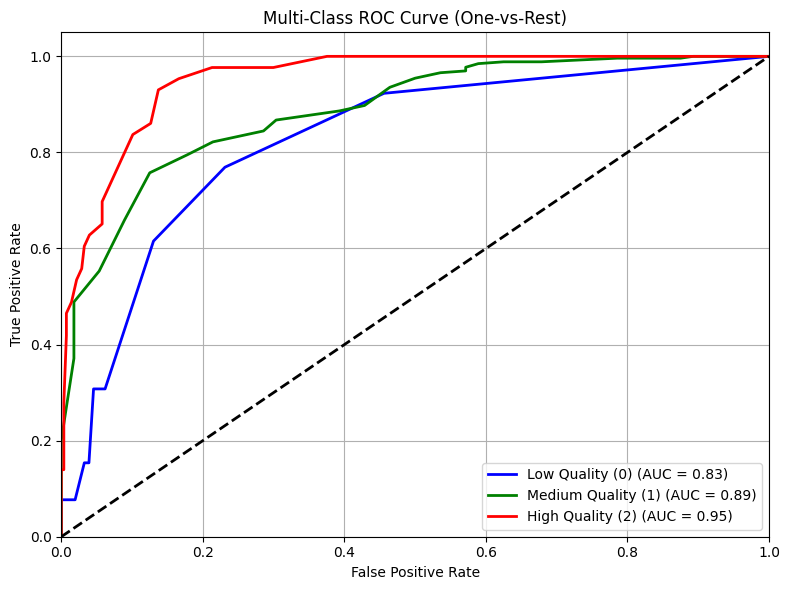

In [30]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Quality (0)', 'Medium Quality (1)', 'High Quality (2)']

for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

#### Reasmple dataset

In [31]:
from collections import Counter

print("Original class distribution:", Counter(y_train))

Original class distribution: Counter({1: 1055, 2: 174, 0: 50})


In [32]:
from imblearn.over_sampling import SMOTE

# Create a SMOTE object
smote = SMOTE(sampling_strategy={0: 200 , 2 : 400}   , random_state=42)# Only bring class 0 to 400 samples and class 2 to 600

# Apply SMOTE to training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train_resampled))


Resampled class distribution: Counter({1: 1055, 2: 400, 0: 200})


In [33]:
param_grid  =  [    
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # Try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]


In [34]:

rfc = RandomForestClassifier(random_state= 42) #initializes a RandomForestClassifier() with default parameters.
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring= 'accuracy',return_train_score = True) #GridSearchCV is used to find the best hyperparameters by trying all possible combinations.
                                                                                               # cv=5: Performs 5-fold cross-validation (splits data into 5 parts and trains on 4 while testing on 1, rotating through).
                                                                                               #Since we have 18 hyperparameter combinations and 5-fold cross-validation,→ Total training runs = 18 × 5 = 90
grid_search.fit(X_train_resampled,y_train_resampled )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [35]:
best_model = grid_search.best_estimator_
best_model


RandomForestClassifier(bootstrap=False, max_features=2, n_estimators=10,
                       random_state=42)

In [36]:

rfc_hyperparameters = grid_search.best_params_ #Returns the best hyperparameters.
rfc_hyperparameters


{'bootstrap': False, 'max_features': 2, 'n_estimators': 10}

In [37]:
y_pred_resampled = best_model.predict(X_test)


In [38]:
y_test.value_counts()

quality
1    264
2     43
0     13
Name: count, dtype: int64

In [39]:
rfc_grid_predicions = best_model.predict(X_test) 
rfc_grid_predicions

array([2, 1, 0, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1,

In [40]:
print(classification_report(rfc_grid_predicions,y_test))

              precision    recall  f1-score   support

           0       0.15      0.29      0.20         7
           1       0.92      0.91      0.92       268
           2       0.70      0.67      0.68        45

    accuracy                           0.86       320
   macro avg       0.59      0.62      0.60       320
weighted avg       0.88      0.86      0.87       320



In [41]:
y_score= best_model.predict_proba(X_test)

In [42]:
fpr = {}
tpr = {}
roc_auc = {}

for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



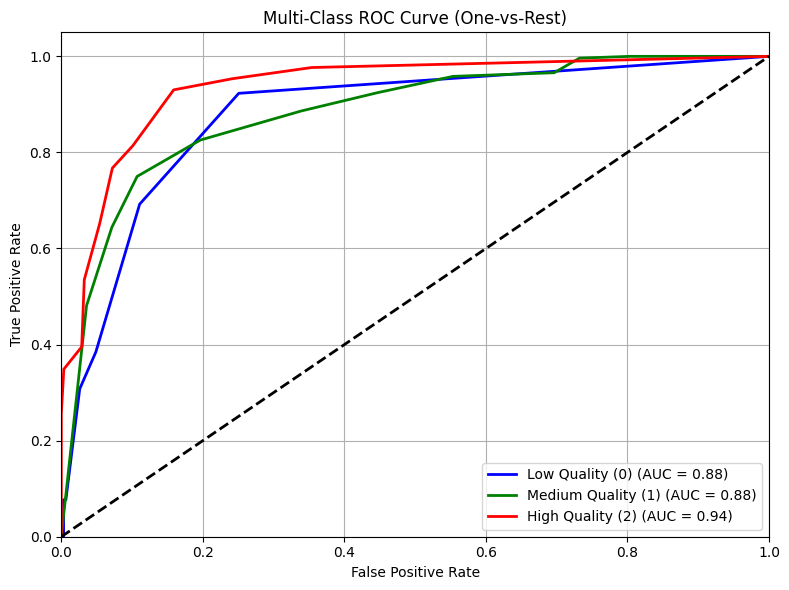

In [43]:
plt.figure(figsize=(8, 6))
colors = ['blue', 'green', 'red']
labels = ['Low Quality (0)', 'Medium Quality (1)', 'High Quality (2)']

for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class ROC Curve (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()

In [44]:
# Create a SMOTE object
smote = SMOTE(sampling_strategy={0: 200 , 2 : 400}   , random_state=42)# Only bring class 0 to 400 samples and class 2 to 600

# Apply SMOTE to training data
X_resample, y_resampled = smote.fit_resample(scaled_data, y)

print("Resampled class distribution:", Counter(y_resampled))

Resampled class distribution: Counter({1: 1319, 2: 400, 0: 200})


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resampled, test_size=0.2, stratify=y_resampled,  random_state=42)

In [46]:
param_grid  =  [    
    # Try 12 (3x4) combinations of hyperparameters
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    
    # Try 6 (2x3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

In [47]:

rfc = RandomForestClassifier(random_state= 42) #initializes a RandomForestClassifier() with default parameters.
grid_search = GridSearchCV(rfc, param_grid, cv=5, scoring= 'accuracy',return_train_score = True) #GridSearchCV is used to find the best hyperparameters by trying all possible combinations.
                                                                                               # cv=5: Performs 5-fold cross-validation (splits data into 5 parts and trains on 4 while testing on 1, rotating through).
                                                                                               #Since we have 18 hyperparameter combinations and 5-fold cross-validation,→ Total training runs = 18 × 5 = 90
grid_search.fit(X_train,y_train )

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='accuracy')

In [48]:
best_model = grid_search.best_estimator_
best_model


RandomForestClassifier(max_features=2, n_estimators=30, random_state=42)

In [49]:
rfc_hyperparameters = grid_search.best_params_ #Returns the best hyperparameters.
rfc_hyperparameters

{'max_features': 2, 'n_estimators': 30}

In [50]:
y_pred_resampled = best_model.predict(X_test)

In [51]:
y_test.value_counts()

quality
1    264
2     80
0     40
Name: count, dtype: int64

In [52]:
rfc_grid_predicions = best_model.predict(X_test) 
rfc_grid_predicions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       0, 1, 2, 1, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1,

In [53]:
print(classification_report(rfc_grid_predicions,y_test))

              precision    recall  f1-score   support

           0       0.65      0.90      0.75        29
           1       0.94      0.87      0.90       283
           2       0.72      0.81      0.76        72

    accuracy                           0.86       384
   macro avg       0.77      0.86      0.81       384
weighted avg       0.87      0.86      0.87       384



In [54]:
y_score= best_model.predict_proba(X_test)
